We must show evidence of:

- Load and preprocess the dataset for the classification problem (handle missing data, convert categorical features to numerical features).
- Build a classifier for the classification problem using one of the specified models (logistic regression, decision trees, random forests, or artificial neural networks).
- Fine-tune the selected model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).
- Visualise the dataset and / or the model's results, where applicable (eg, feature importance, confusion matrix, etc).
- Report the final performance of the selected model using appropriate performance metrics (eg, accuracy, F1-score, etc).

- Load and preprocess the dataset for the multi-label image-based digit classification problem (normalise pixel values, resize images if necessary, etc).
- Build a convolutional neural network (CNN) model for the multi-label image-based digit classification task.
- Fine-tune the CNN model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).
- Visualise the dataset and / or the CNN model's results, where applicable (eg, feature maps, learning curves, etc).
- Report the final performance of the CNN model using appropriate performance metrics (eg, accuracy, F1-score, etc).
- Collaborate within the team and decide on the best model (for classification) and CNN architecture (for digit recognition).
- Submit the code as Jupyter Notebooks.


Notebook should also contain:

- All of your materials which demonstrate successful completion of the tasks above.
- The Jupyter Notebook file should contain all output cells.
- The code you produce to solve the above tasks should make good use of structure, logic and commenting to be clear and robust.
- Variable names should be thoughtfully considered and appropriate for the purpose. Ensure that scope conflicts are avoided, and that variable names don’t leak into other code areas. It will help to consider how the structures covered throughout the module may be used. Similarly, it would be best to be mindful of error handling where appropriate.
- The use of markdown cells is advised to keep a clear distinction between tasks.
- It is expected that you will use commenting in markdown cells to explain how you have handled the task.
- This notebook should include detailed comments that outline the individual contributions of each team member, the learning experiences that resulted from collaboration, and the reasoning behind the choice of the final models. Be sure to mention any specific insights or improvements gained through your collaborative efforts.
- Use only your student ID number to identify yourself. Do not include your name in your coursework or the file name.

# *771948_A23_T3A: Machine Learning & Deep Learning - Coursework 1*
### Authors: 202326742 & 
***

## 1 - Classification of Dataset1

### 1.1 - Importing and Exploring the Data

To start with, we imported pandas and subsequently the dataset, exploring it together first by understanding the different datatypes present within each column:

In [135]:
import pandas as pd

raw_data = pd.read_excel("dataset1.xlsx")
raw_data.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [136]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


Use of the '.info()' function also shows the 600 null values present within the 'var4' column, which is something we will address. For now, we focused on the numerical columns and explored the statistic of them:

In [137]:
raw_data.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


Due to the 'int64' datatype shown in the 'target' column and the min and max values discovered, we know this is a binary classification problem. Observing this table, there appears to be some non-normal distributions within some of the columns. This is explored using histograms, with left-skew on 'var4' and the right-skews to varying degrees on 'var1', 'var2', and 'var5' being noted:

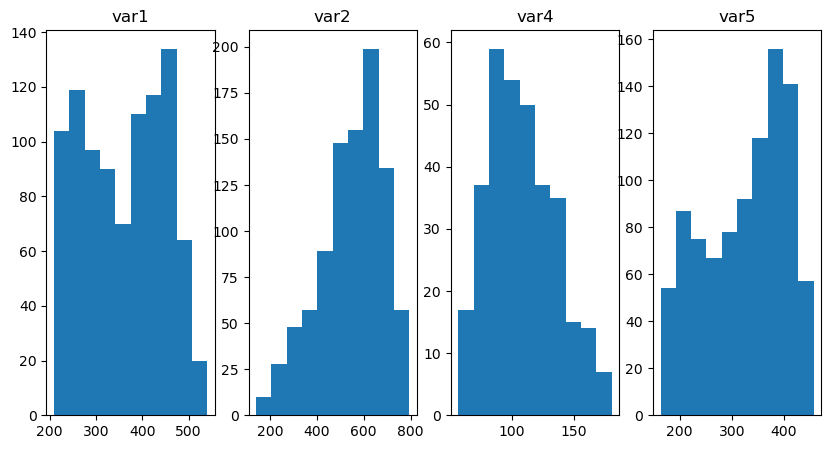

In [138]:
import matplotlib.pyplot as plt

var_nums = [1, 2, 4, 5]
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

for i in range(4):
    
    axs[i].hist(raw_data[f'var{var_nums[i]}'])
    axs[i].set_title(f'var{var_nums[i]}')

plt.show()

### 1.2 - Data Cleaning & Preprocessing

First, we focused on the missing values within 'var4', and together brainstormed different ways to replace these. Mean replacement was tried first, simply replacing all the nan values with the mean value of the column. However, as shown by the boxplots before and after, this significantly impacted the distribution of the data due to the large proportion of nan values present.

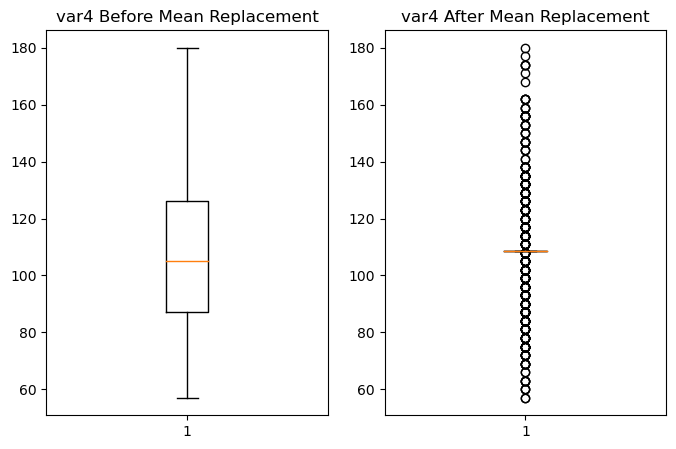

In [139]:
mean_value = raw_data['var4'].mean()

data_copy = raw_data['var4'].copy()  # creating a new data object for testing modifications.
data_copy = data_copy.fillna(mean_value)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].boxplot(raw_data['var4'].dropna())
axs[0].set_title('var4 Before Mean Replacement')

axs[1].boxplot(data_copy)
axs[1].set_title('var4 After Mean Replacement')

plt.show()

Similar problems were encountered when using median replacement. Our next idea was Random Sample Imputation, which is where for each null value, we randomly select an existing value to replace it with.

Text(0.5, 1.0, 'var4 After Mean Replacement')

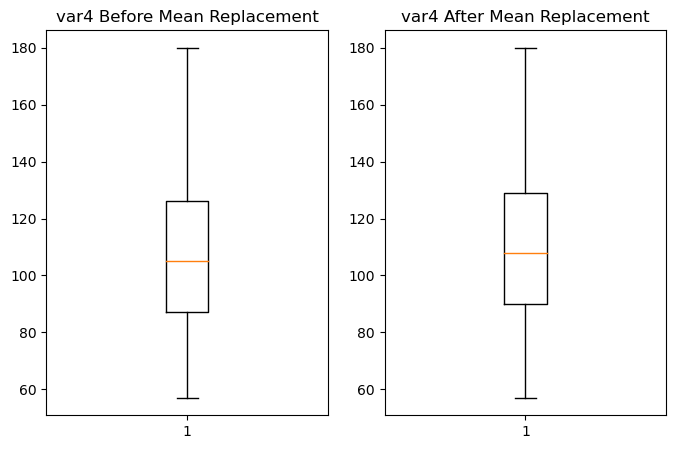

In [140]:
import numpy as np
import random

original_var4 = raw_data['var4']
data_copy = raw_data['var4'].copy()

for index, row in raw_data.iterrows():
    if np.isnan(row['var4']):
        random_sample = original_var4.iloc[random.randrange(len(original_var4.dropna()))]  # randomly selects a value from original subset.
        data_copy[index] = random_sample  # replaces the nan value with the random sample.

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].boxplot(raw_data['var4'].dropna())
axs[0].set_title('var4 Before Mean Replacement')

axs[1].boxplot(data_copy)
axs[1].set_title('var4 After Mean Replacement')

As shown above, this has the benefit of approximately preserving the distribution of the data, however does result in a lot of meaningless data being added. Therefore, we decided to use this but noted that if our model does not prove effective then this is a key aspect to review.

In [141]:
clean_data = raw_data.copy()  # creating a copy of the data to add our final preprocessing modifications.
clean_data['var4'] = data_copy

Now we considered var7, which from our exploration earlier we know contains date and time information. We decided this would not be useful to our model, and so removed it:

In [142]:
clean_data.drop(columns=['var7'], inplace=True)

Next was var3, which upon initial inspection appears to contain country names. We looked at this further by establishing the number of unique entries that appear in this column:

In [143]:
len(clean_data["var3"].unique())

236

236 is a large number, and encoding that many values would dramatically increase the dimensionality of what otherwise is a simple dataset. Therefore, we decided to drop this column too, but noted that it is an aspect to consider if model performance is poor.

In [144]:
clean_data.drop(columns=['var3'], inplace=True)

Now we are looking at var6, which initially appears to simply contain the binary entries of 'yes' and 'no'. This was checked:

In [145]:
from collections import Counter
Counter(clean_data["var6"])

Counter({'yes': 483, 'no': 442})

Therefore we proceeded to one-hot encode this column, in order to convert from a string datatype to a numerical one:

In [146]:
clean_data = pd.get_dummies(clean_data, columns=['var6'], drop_first=False)  # creates a new column for each unique entry in var6.
clean_data['var6_no'] = clean_data['var6_no'].astype(int)  # converts from bool to int.
clean_data['var6_yes'] = clean_data['var6_yes'].astype(int)

With all of this cleaning and preprocessing complete, here is the new condition of the dataset:

In [147]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    925 non-null    int64  
 1   var1      925 non-null    float64
 2   var2      925 non-null    float64
 3   var4      925 non-null    float64
 4   var5      925 non-null    float64
 5   var6_no   925 non-null    int32  
 6   var6_yes  925 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 43.5 KB


### 1.3 - Decision Tree Model

### 1.4 - Random Forest Model

### 1.5 - Conclusions for Task 1